In [282]:
import pathlib

import matplotlib.pyplot as plt
import japanize_matplotlib
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

from tensorflow.python.client import device_lib

from sklearn.metrics import mean_absolute_error
from modules import plotformodel as pfm
from modules import statistic_function as sf


print(tf.__version__)

2.8.0


In [283]:
GROUP_NAME = "highccgroup"
new_model = tf.keras.models.load_model("./models/" + GROUP_NAME + "/dnn_model_hard_sigmoid")
testb = pd.read_csv("./Dataset/" + GROUP_NAME + "/testB.csv")
testb_index = pd.read_csv("./Dataset/" + GROUP_NAME + "/testB_index.csv")

In [284]:
testb["atemperature"] = -testb["atemperature"]
testb["ltemperature"] = -testb["ltemperature"]
testb["htemperature"] = -testb["htemperature"]

In [285]:
test_features = testb.copy()

In [286]:
test_features.head()

,atemperature,ltemperature,htemperature,windSpeed(m/s),sonw(accumulated),snow,sunshine,humidity(%),interval,last_year_mean,last_year_sum,price,Year sin,Year cos
0,3.9,8.2,0.9,2.2,55,1,1.1,64,1,34.611465,5434.0,85,0.542898,0.839798
1,2.1,3.9,-0.9,2.7,55,0,1.8,75,1,34.611465,5434.0,85,0.557264,0.830335
2,2.0,4.6,0.1,2.5,59,6,0.0,81,1,34.611465,5434.0,85,0.571465,0.820626
3,4.8,8.2,1.4,2.5,59,0,6.6,67,1,34.611465,5434.0,85,0.585497,0.810675
4,5.4,11.1,1.5,2.9,58,3,3.8,62,1,34.611465,5434.0,85,0.599356,0.800483


In [287]:
test_predictions = new_model.predict(test_features).flatten()

In [288]:
prediction_v = []
for i in range(len(testb_index)):
    volume = 0
    for j in range(testb_index.loc[i, "first_index"], testb_index.loc[i, "final_index"]+1):
        volume += test_predictions[j]
    prediction_v.append(volume)

In [289]:
MAE = mean_absolute_error(testb_index["volume"], prediction_v)
print(MAE)

47.44211957496095


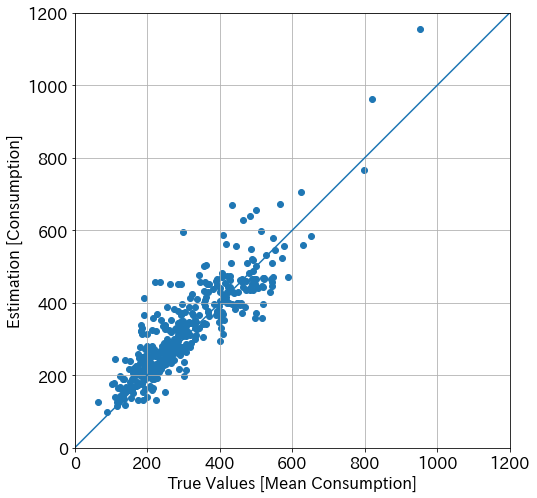

In [290]:
plt.rcParams['figure.figsize'] = [8, 8]

a = plt.axes(aspect='equal')
plt.scatter(list(testb_index["volume"]), prediction_v)
plt.xlabel('True Values [Mean Consumption]',fontsize=16)
plt.ylabel('Estimation [Consumption]',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
lims = [0, 1200]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
plt.grid(True)

In [291]:

error = (pd.Series(prediction_v) - pd.Series(testb_index["volume"]))/pd.Series(testb_index["volume"])


In [292]:
sf.error_distribution(error)

-0.2~0.2: 0.7096774193548387
>0.2: 0.2456575682382134
<-0.2: 0.04466501240694789


In [293]:
print("1" + str(1))

11
